In [1]:
import numpy as np
import numpy.linalg as la
import graph
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-m4oipsp2 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Lesson 7: Markov Chains

A Markov chain is a mathematical model used to describe a set of states and the probability of transitioning between them.

<img src="markov.svg" width=300px></img>

As a small example, let's create a Markov chain to model the weather outside. We will have two states to represent the possible weather for a day:

1. Sunny
2. Snowy

After collecting data about the weather for many years, you observed that the chance of a snowy day occurring after one snowy day is 90% and that the chance of a snowy day after one sunny day is 70%.

 We can see this visually with the following graph. Do you understand how we were able to obtain the other numbers? Recall that we are dealing with probabilities that should sum up to 100%.

<img src="weather_graph.png" width=446px></img>

This is a *directed graph* because *edges have direction*. We can represent this (unsurprisingly) using a matrix, similarly to how we created the adjacency matrix, with the same notation for the edge direction: the columns of the matrix represent outgoing edges, while the rows represent incoming edges:

<img src="weather_matrix.png" width=305px></img>

and each entry of the matrix is given by:

$$ M_{ij} = \text{probability of moving from } j \text{ to } i $$

The matrix above is called the **Markov matrix**, which has the following properties:

- $M_{ij}$ entry of a transition matrix has the probability of transitioning from state $j$ to state $i$

- Since the entries are probabilities, they are always non-negative real numbers, and the columns should sum to 1.


In [2]:
M = np.array([[0.3, 0.1], [0.7, 0.9]])

Now that we have created the model, we can use it to calculate various probabilities. Let's say that today was a sunny day, which we can represent by a vector that is 100% sunny and 0% snowy:

In [3]:
x = np.array([1.0, 0.0])

If we multiply our transition matrix by our state vector, we can find the probability of having each type of day tomorrow:

In [4]:
x1 = M @ x
x1

array([0.3, 0.7])

This doesn't give us any new information, so lets see what happens when we multiply the state vector again:

In [5]:
x2 = M @ x1
x2

array([0.16, 0.84])

Now, we have "simulated" the Markov chain twice, which tells us the weather probability in _two_ days.  What would happen if we multiplied our new vector by the matrix a large number of times?

**Try this!**

Write a loop to left-multiply (${\bf Mx}$) the state vector $15$ times, printing out each intermediate value. Start your iterations using the state vector defined above as `x`.

In [ ]:
xc = x.copy()
# Write loop here


You can see that for enough iterations we will eventually converge to a steady state ${\bf x}^* $, and multiplying this steady state by the Markov matrix will no longer modify the vector, i.e.

$$ {\bf M}{\bf x}^* = {\bf x}^* $$

Note that this is an eigensystem problem, where $(1,{\bf x}^*)$ is an eigenpair. Indeed, we  found the eigenvector of ${\bf M}$ with corresponding eigenvalue $\lambda = 1$!

Computing the eigenvector like this is called the [*Power Iteration method*](https://en.wikipedia.org/wiki/Power_iteration), and can be used to find the eigenvector that corresponds to the *dominant* eigenvalue (largest eigenvalue in magnitude).

**Check your answers!**

Implement the function `power_iteration()` that takes a matrix `M` and starting vector `x`, and computes the eigenvector corresponding to dominant eigenvalue (same as you have done above).

For simplicity, **use 100 iterations for your loop**.

In [6]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def power_iteration(M, x):
    # Perform power iteration and return steady state vector xstar
    xc = x.copy()
    for i in range(100):
        xc = M @ xc
    return xc

Run your `power_iteration()` function on `M` and a new vector,
$$ {\bf x} = \begin{bmatrix} 0.5 \\ 0.5\end{bmatrix} $$

Do you get the same result as before?

In [7]:
power_iteration(M, np.array([0.5, 0.5]))

array([0.125, 0.875])

As long as the starting state vector `x` is normalized (the entries add up to one), the steady state solution will be the same. There is one caveat to this statement, which we will discuss in the next section.

Take a look at the code snippet below. Notice that the steady state solution does not change, regardless of the initial vector (here generated at random).

In [8]:
# run this as many times as you want, the bottom vector should always stay the same!
random_vector = np.random.rand(2)
random_vector /= np.sum(random_vector) # normalize

print(random_vector)
print(power_iteration(M, random_vector))

[0.65740945 0.34259055]
[0.125 0.875]


Note that `random_vector` is normalized by dividing by the sum of its entries. 
In this lesson, since a state vector is a vector of probabilities (non-negative entries), we can view this as  L1-normalization. 
The L1 norm of a vector, also known as Manhattan Distance or Taxicab norm, is calculated as the sum of the absolute values of its entries. For instance, the L1 norm of a vector `x` can be calculated in NumPy using [`numpy.linalg.norm(x, ord=1)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html),
where the parameter `ord=1` specifies the norm order. Check the NumPy documentation to see what `numpy.linalg.norm(x)` calculates when the parameter `ord` is not specified.

# The Gambler's Ruin and Reducibility

Consider a gambler starting with some amount of money, say $\$1$.

The gambler is playing a game in which they either gain or lose $\$1$, with equal probability.
If the gambler runs out of money, they must stop playing; their goal is to have $\$3$ before this happens.

We can represent this as the state graph below.  Starting at the $\$1$ state, there is a $50\%$ chance of losing money (and the game) &mdash; the "$\$0$ (Lose)" state &mdash; and a $50\%$ chance of winning a dollar &mdash; the "$\$2$" state.

<img src="Gambler.svg"></img>

**Check your answers!**

Create the Markov matrix, denoted `G`, that follows the state diagram above. Order your columns with the $\$i$ state represented by the $i$th column.

In [9]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
G = np.array([[1, 0.5, 0, 0], [0, 0, 0.5, 0], [0, 0.5, 0, 0], [0, 0, 0.5, 1]])

You can display your matrix as a graph to check your work.

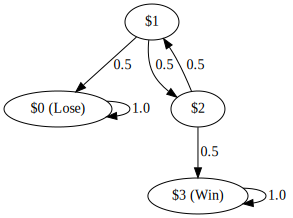

In [10]:
labels = ['$0 (Lose)', '$1', '$2', '$3 (Win)']
graph.draw_matrix(G, labels)

Suppose the gambler starts with $\$1$ ($100\%$ probability of being in the $\$1$ state). Write the initial state as the array `x0`:

In [11]:
x0 = np.array([0.0, 1.0, 0.0, 0.0])

**Try this!**

Use power iteration to get the probability of losing and winning using the initial state defined as `x0` and store your result in `xstar1`

In [13]:
# define xstar1
xstar1 = x0.copy()

power_iteration(G,xstar1)

# Print out the probability
print(np.round(xstar1 * 100,2))

[  0. 100.   0.   0.]


**Check your answers!**

Now use power iteration to get the probability of winning and losing if the gambler starts with $\$2$ instead. Store your result in `xstar2`.

In [16]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
x1 = np.array([0.0, 0.0, 1.0, 0.0])

xstar2 = power_iteration(G,x1.copy())

Print out `xstar2`. Is this result different from `xstar1`?

In [17]:
print(np.round(xstar2 * 100, 2))

[33.33  0.    0.   66.67]


Because we can no longer reach every state from every other state, **we no longer have a unique steady state**.  A Markov chain of this type is said to be "reducible".

The code snippet below runs power iteration for a random initial state vector. 
Run it many times, and see what happens to the resulting vector:

In [18]:
x = np.random.rand(4)
x = x / la.norm(x,1) # x = x / np.sum(x)
print(np.round(power_iteration(G, x),2))

[0.47 0.   0.   0.53]


We can no longer observe the behavior in which the steady state vector is the same, no matter the given initial vector.


# Google PageRank

Google's dominance as a search engine came from their [_PageRank_](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) algorithm, named after co-founder Larry Page.  By assigning each page a relative rank, web searches can give more relevant results.

The idea here is to model a user surfing different web pages by randomly clicking on links.  Pages with more incoming links (i.e. more citations) are presumed to be higher quality and therefore get a higher PageRank value.

We can model this as a graph, where each webpage has a chance of moving to another one:

<img src="PageRank Example.svg" width="300px"></img>

This probability of moving from one page to another is estimated from the number of outgoing links; more formally, the probability of moving from page $j$ to page $i$ is given by:

$$ p\left(i \vert j\right) = \frac{\text{number of links from }j\text{ to }i}{\text{total links going out of } j}$$

For example, if Google has 4 outgoing links:

 - 1 to Twitter
 - 1 to Reddit
 - 2 to Facebook

Then it would have a $0\%$ probability of linking to itself, $25\%$ to Twitter, $25\%$ to Reddit, and $50\%$ to Facebook.

Let's try finding the steady state of a small example.  You are given an adjacency matrix ${\bf A}$ such that each entry $A_{ij}$ contains the number of links going *into* page $i$ *from* $j$.

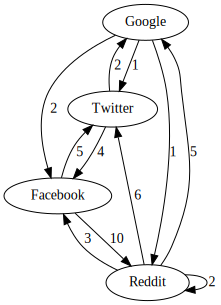

In [19]:
A = np.array([[0,  2,  0,  5],
              [1,  0,  5,  6],
              [2,  4,  0,  3],
              [1,  0, 10,  2]])

labels = ['Google', 'Twitter', 'Facebook', 'Reddit']
graph.draw_matrix(A, labels, directed=True)

**Check your answers!**

First, convert `A` to a Markov matrix `M2` by converting each entry to a probability; that is, convert each column to a probability vector. *Hint: Try not to hard-code the answer; instead, adjust the columns of in a programmatic way. Recall that `B[:,i]` slices the $i$th column of a NumPy array `B` and to normalize you can use the `sum` function.*

In [21]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
M2 = A.copy().astype(float)
# Convert entries in M2 below
for i in range(len(M2)):
    M2[:,i] = M2[:,i]/np.sum(M2[:,i])

**Try this!**

Now, use power iteration as you have done before to find the steady-state of the Markov matrix. You can use any starting vector you like, as long as it is normalized. This steady-state is the relative PageRank of each webpage. Store your result in `eigvec`.

Now you can print it out:

In [22]:
print(eigvec)

NameError: name 'eigvec' is not defined

What is the highest ranking site here?  You can use `labels` to get a name from a node index.

In [23]:
print(labels[np.argmax(eigvec)])

NameError: name 'eigvec' is not defined

## Larger Example

Let's try a larger example with more websites.  We will have a slightly different format to represent our links.

In [24]:
num_pages = 20

# Array with the edges
edges = np.loadtxt("pagerank_large.txt").astype(np.int64)

# these are random, don't look too deeply into this...
labels = ['Google', 'Twitter', 'Facebook', 'Reddit', 'WordPress', 'ArXiv', 'Amazon', 'UIUC', 'Wikipedia', 'IMDb',
          'GitHub', 'Yahoo!', 'Flickr', 'Apple', 'Baidu', 'VKontakte', 'Mozilla', 'LinkedIn', 'YouTube', 'NASA']

print(edges)

[[19 13]
 [10  4]
 [10 19]
 [10 18]
 [ 1 14]
 [12 13]
 [13 18]
 [ 8 13]
 [ 8  1]
 [ 1  6]
 [ 7  5]
 [13  2]
 [ 9 14]
 [ 3 17]
 [ 7 18]
 [ 3 15]
 [14 17]
 [ 9 16]
 [ 2  4]
 [ 3  6]
 [12  9]
 [ 8 14]
 [ 1 15]
 [15 16]
 [ 0 13]
 [ 8  5]
 [17 12]
 [10  9]
 [ 5  6]
 [12 16]
 [17  0]
 [ 2  9]
 [15 17]
 [ 6  6]
 [17  1]
 [14 13]
 [ 2 18]
 [ 9  9]
 [ 4 10]
 [ 3  5]
 [ 3 11]
 [ 8  7]
 [ 4  8]
 [ 5  9]
 [ 4  3]
 [17  3]
 [ 1 12]
 [19 19]
 [ 7  3]
 [ 3 14]
 [ 0 11]
 [19 11]
 [ 9  1]
 [14  9]
 [13 11]
 [ 6  2]
 [ 5 11]
 [19 17]
 [17  5]
 [ 0  5]
 [ 4 13]
 [ 6 16]
 [16 19]
 [12  1]]


The link information is given in the `edges` 2d numpy array, that has shape `(total number of links, 2)`

In [25]:
edges.shape

(64, 2)

Each row of `edges` has two entries, `[a,b]`, representing an edge (outgoing link) from website with index `a` to website with index `b`.

For example, if the row is `[1, 8]`, then there is an edge/link going out of node `1` into node `8`.

From the `edges` array, first create the adjacency matrix such that 
$$    
{\bf A}_{i,j}= 
\begin{cases}
    1,& \text{if webpage } i \text{ can be reached from webpage }j \\
    0,              & \text{otherwise}
\end{cases}
$$
You can assume that there are $n=20$ websites in total, and thus you will have a $20\times 20$ adjacency matrix.

In [26]:
A2 = np.zeros((num_pages, num_pages))
for edge in edges:
    A2[edge[1], edge[0]] = 1
A2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.

We can draw the adjacency matrix for a visual depiction of what is going on:

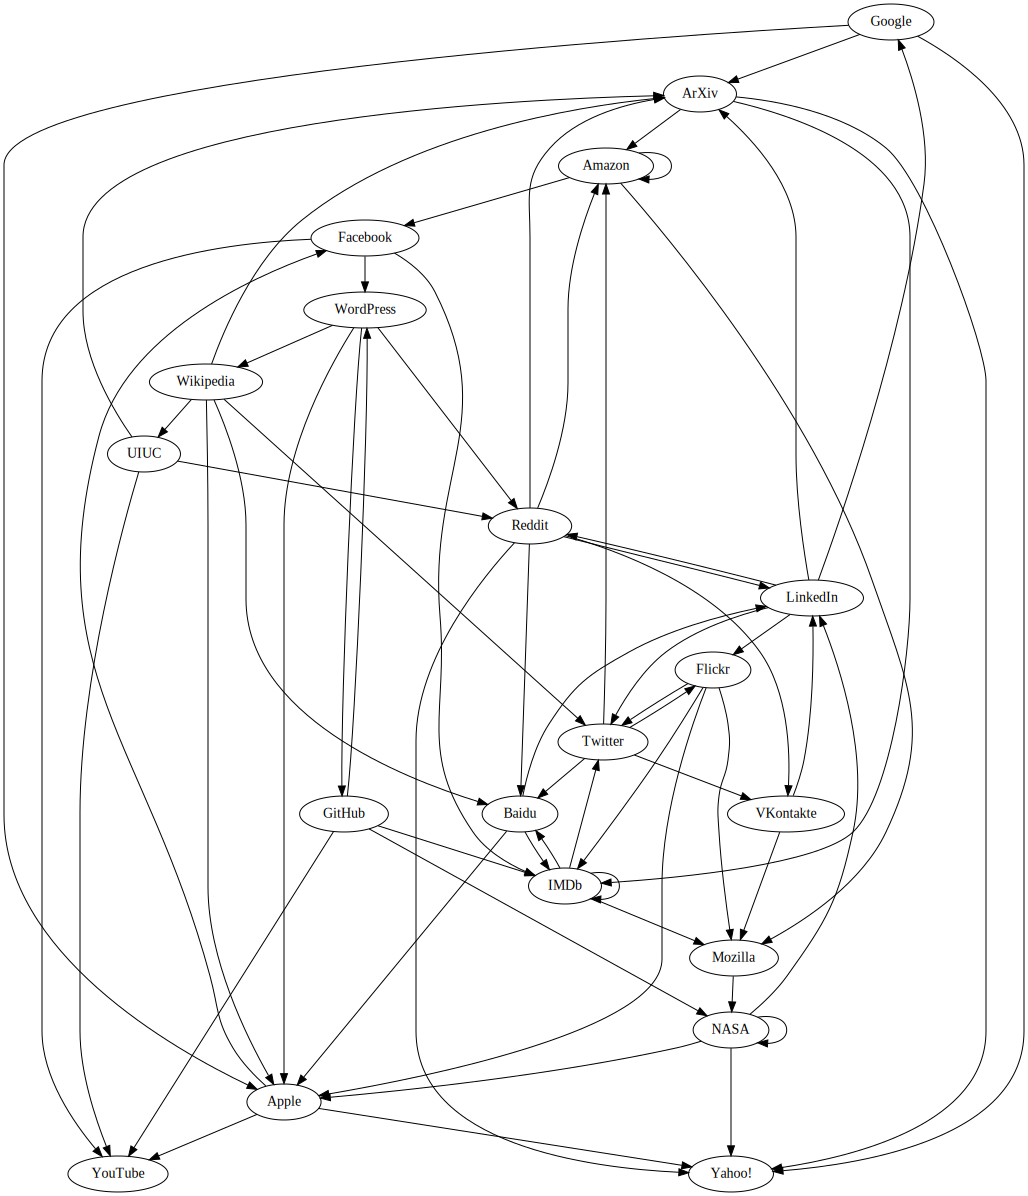

In [27]:
graph.draw_matrix(A2, labels, show_weights=False)

Now, create the Markov matrix  ${\bf M}$ from the adjacency matrix as you have done before.  Recall that in order to satisfy the Markov property that the column sum is equal to 1, we need to normalize columns by dividing its values by the column sum.

In [28]:
M = A2 / la.norm(A2, 1, axis=0)
M

<ipython-input-28-374f7abfe8b6>:1: RuntimeWarning: invalid value encountered in true_divide
  M = A2 / la.norm(A2, 1, axis=0)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,        nan, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       ,        nan, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.25      ,
        0.        ,        nan, 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.2       ,        nan, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        ,        nan, 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        ,        nan, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        ,        nan, 0.        , 0

What do you observe? Looks like you may have tried to compute divisions by zero!

**What happens when there is no outgoing link from a website?**

The column corresponding to that website will only have zero entries, and if we apply the above normalization, we will have a division by zero.

Once the web surfer reaches a page without outgoing links, we can assume that they will probably not stay on that webpage forever.

How would you model the behavior of a web-surfer that is browsing a website without outgoing links? 

**Discuss this with your group.** Come up with ideas first, before reading the following text.

![](brainstorming.jpg)




**The PageRank algorithm proposes the following:**
once the web surfer reaches a page without outgoing links, it assumes that the web surfer will move to any of the webpages with equal probability $1/n$, where $n$ (defined as `num_pages`) is the number of pages.

**Check your answers!**

Using the matrix adjacency matrix ${\bf A}_2$, construct the Markov matrix ${\bf M}_3$ following this proposed model and store your result in variable `M3`.

In [30]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
M3 = A2.copy().astype(float)
for i in range(len(M3)):
    if np.sum(M3[:,i]) != 0:
        M3[:,i] = M3[:,i]/np.sum(M3[:,i])
    elif np.sum(M3[:,i]) == 0:
        M3[:,i] = 1/num_pages

**Try this!**

Use your defined function `power_iteration` to find the PageRank steady-state vector and save this as `pr`.

You can see the ranking of all the websites using the PageRank algorithm:

In [ ]:
names = np.array(labels)
names[np.argsort(pr)[::-1]]